In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

# Facebook-Ego

In [2]:
G_fb = nx.read_edgelist("Group7/Facebook-Ego/1912.edges", create_using = nx.Graph(), nodetype = int)
Nodes_fb = G_fb.nodes()
Edges_fb = G_fb.edges()
print(f"Number of nodes: {len(Nodes_fb)}, number of edges: {len(Edges_fb)}")
print("is the graph connected? ", nx.is_connected(G_fb))

Number of nodes: 147, number of edges: 1235
is the graph connected?  False


[40, 38, 34, 33, 33, 31, 31, 31, 31, 31]


Text(0.5, 0, 'Degree')

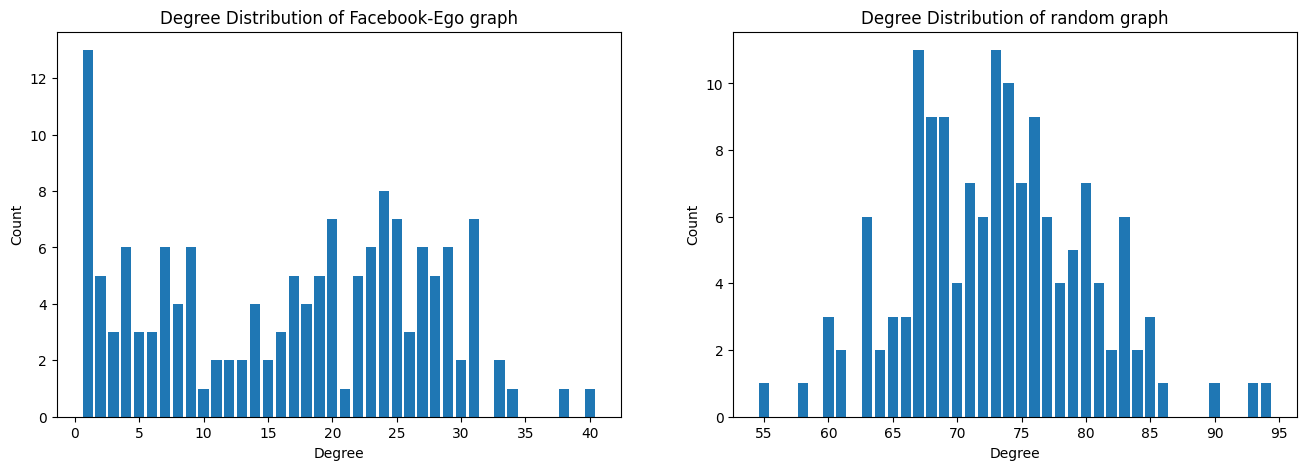

In [3]:
# a) Comparing the degree distribution of the Facebook-Ego graph with a random graph

degree_sequence = sorted([d for n, d in G_fb.degree()], reverse=True) 
print(degree_sequence[:10])

G = nx.gnp_random_graph(len(Nodes_fb), 0.5, seed=49)
degree_sequence_random = sorted((d for n, d in G.degree()), reverse=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
ax1.bar(*np.unique(degree_sequence, return_counts=True) )
ax1.set_title("Degree Distribution of Facebook-Ego graph")
ax1.set_ylabel("Count")
ax1.set_xlabel("Degree")

ax2.bar(*np.unique(degree_sequence_random, return_counts=True))
ax2.set_title("Degree Distribution of random graph")
ax2.set_ylabel("Count")
ax2.set_xlabel("Degree")


b) The main difference between the chosen network and a random network with the same number of nodes is in their degree distributions:

    Chosen Network: Likely exhibits a scale-free degree distribution with a few highly connected nodes (hubs) and a majority of nodes with relatively low degrees. It may have higher clustering and assortative mixing.

    Random Network: it follows a  Poisson degree distribution, where node degrees are evenly distributed. It lacks the presence of hubs and may have lower clustering.

The differences arise from real-world factors, preferential attachment, and assortative mixing (the tendency of nodes in a network to connect to others with similar attributes or properties) in the chosen network, while random networks lack these characteristics.

In [4]:
connected_components = list(nx.connected_components(G_fb))
len(connected_components)

5

In [5]:
#c) since our network is not connected, We will Calculate the average path length for each connected component
avg_path_lengths = []
for i, component in enumerate(connected_components):
    subgraph = G_fb.subgraph(component)
    average_path_length = nx.average_shortest_path_length(subgraph)
    avg_path_lengths.append(average_path_length)
    print(f"Connected Component {i + 1}: Average Path Length = {average_path_length:.2f}")


print("=====================================")
overall_avg_path_length = sum(avg_path_lengths) / len(avg_path_lengths)
print(f"Average Path Length for Largest Connected Component: { max(avg_path_lengths):.2f}")
print(f"Average Path Length for Overall Graph: {overall_avg_path_length:.2f}")

Connected Component 1: Average Path Length = 2.94
Connected Component 2: Average Path Length = 1.67
Connected Component 3: Average Path Length = 1.50
Connected Component 4: Average Path Length = 1.33
Connected Component 5: Average Path Length = 1.00
Average Path Length for Largest Connected Component: 2.94
Average Path Length for Overall Graph: 1.69


In [6]:
# d) Calculate  the clustering coefficient for each selected node
random.seed(49)
random_nodes = random.sample(G_fb.nodes(), 5)
print("selected nodes: ", random_nodes)
for node in random_nodes:
    clustering_coefficient = nx.clustering(G_fb, node)
    print(f"Node {node}: Clustering Coefficient = {clustering_coefficient:.2f}")

selected nodes:  [1955, 2061, 1936, 1991, 2009]
Node 1955: Clustering Coefficient = 0.70
Node 2061: Clustering Coefficient = 0.67
Node 1936: Clustering Coefficient = 0.46
Node 1991: Clustering Coefficient = 0.71
Node 2009: Clustering Coefficient = 0.63


/tmp/ipykernel_10787/3447849010.py:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_nodes = random.sample(G_fb.nodes(), 5)


In [7]:
# e) Calculate the average clustering coefficient for the graph
average_clustering_coefficient = nx.average_clustering(G_fb)
print(f"Average Clustering Coefficient: {average_clustering_coefficient:.2f}")


Average Clustering Coefficient: 0.59


In [8]:
# f) Calculate the size of the largest connected component
largest_component = list(max(connected_components, key=len))

print("size of the largest component:", len(largest_component))
print("Nodes in the Largest Connected Component:", largest_component)


size of the largest component: 134
Nodes in the Largest Connected Component: [2049, 2050, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 1577, 136, 1718, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1934, 1935, 1936, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1950, 1951, 1952, 1953, 1954, 1955, 1957, 1958, 1959, 1960, 1962, 1963, 1964, 1965, 1966, 1968, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1465, 1977, 1979, 1978, 1981, 1980, 1983, 1984, 1985, 1986, 1987, 1989, 1990, 1991, 1993, 1994, 1995, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2009, 2010, 2011, 2012, 2013, 2014, 2016, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2035, 2036, 2037, 2038, 2039, 2040, 2042, 2043, 2044, 2045, 2046, 2047]


## Twitter-Ego

In [10]:
G_tw = nx.read_edgelist("Group7/Twitter-Ego/2841151.edges", create_using = nx.DiGraph(), nodetype = int)
Nodes_tw = G_tw.nodes()
Edges_tw = G_tw.edges()
print(f"Number of nodes: {len(Nodes_tw)}, number of edges: {len(Edges_tw)}")
print("is the graph weakly connected: ", nx.is_weakly_connected(G_tw))
print("is the graph strongly connected: ", nx.is_strongly_connected(G_tw))


Number of nodes: 127, number of edges: 1391
is the graph weakly connected:  False
is the graph strongly connected:  False


[90, 73, 72, 71, 67, 67, 63, 60, 57, 57]


Text(0.5, 0, 'Degree')

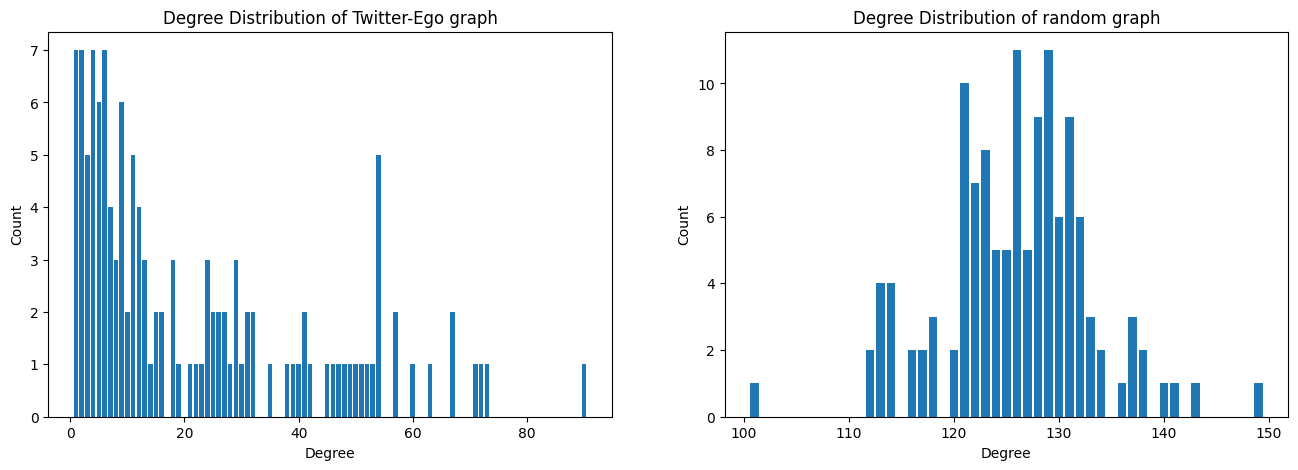

In [11]:
# a) Comparing the degree distribution of the Twitter-Ego graph with a random graph

degree_sequence = sorted([d for n, d in G_tw.degree()], reverse=True) 
print(degree_sequence[:10])

G = nx.gnp_random_graph(len(Nodes_tw), 0.5, seed=49, directed=True)
degree_sequence_random = sorted((d for n, d in G.degree()), reverse=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
ax1.bar(*np.unique(degree_sequence, return_counts=True) )
ax1.set_title("Degree Distribution of Twitter-Ego graph")
ax1.set_ylabel("Count")
ax1.set_xlabel("Degree")

ax2.bar(*np.unique(degree_sequence_random, return_counts=True))
ax2.set_title("Degree Distribution of random graph")
ax2.set_ylabel("Count")
ax2.set_xlabel("Degree")

In [12]:
connected_components_tw = list(nx.strongly_connected_components(G_tw))
len(connected_components_tw)

18

In [13]:
# c) since our network is not connected, We will Calculate the average path length for each strongly connected component
avg_path_lengths_tw = []
for i, component in enumerate(connected_components_tw):
    subgraph = G_tw.subgraph(component)
    average_path_length = nx.average_shortest_path_length(subgraph)
    avg_path_lengths_tw.append(average_path_length)
    print(f"Connected Component {i + 1}: Average Path Length = {average_path_length:.2f}")


print("=====================================")
overall_avg_path_length_tw = sum(avg_path_lengths_tw) / len(avg_path_lengths_tw)
print(f"Average Path Length for Largest Connected Component: { max(avg_path_lengths_tw):.2f}")
print(f"Average Path Length for Overall Graph: {overall_avg_path_length_tw:.2f}")

Connected Component 1: Average Path Length = 1.00
Connected Component 2: Average Path Length = 0.00
Connected Component 3: Average Path Length = 0.00
Connected Component 4: Average Path Length = 0.00
Connected Component 5: Average Path Length = 0.00
Connected Component 6: Average Path Length = 0.00
Connected Component 7: Average Path Length = 0.00
Connected Component 8: Average Path Length = 0.00
Connected Component 9: Average Path Length = 0.00
Connected Component 10: Average Path Length = 2.55
Connected Component 11: Average Path Length = 0.00
Connected Component 12: Average Path Length = 1.00
Connected Component 13: Average Path Length = 0.00
Connected Component 14: Average Path Length = 0.00
Connected Component 15: Average Path Length = 0.00
Connected Component 16: Average Path Length = 0.00
Connected Component 17: Average Path Length = 0.00
Connected Component 18: Average Path Length = 0.00
Average Path Length for Largest Connected Component: 2.55
Average Path Length for Overall G

In [14]:
# d) Calculate  the clustering coefficient for each selected node
random.seed(49)
random_nodes = random.sample(G_tw.nodes(), 5)
print("selected nodes: ", random_nodes)
for node in random_nodes:
    clustering_coefficient = nx.clustering(G_tw, node)
    print(f"Node {node}: Clustering Coefficient = {clustering_coefficient:.2f}")

selected nodes:  [21625307, 6478202, 14536491, 20570314, 6608332]
Node 21625307: Clustering Coefficient = 0.50
Node 6478202: Clustering Coefficient = 0.61
Node 14536491: Clustering Coefficient = 0.34
Node 20570314: Clustering Coefficient = 0.28
Node 6608332: Clustering Coefficient = 0.34


/tmp/ipykernel_10787/2067236239.py:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_nodes = random.sample(G_tw.nodes(), 5)


In [15]:
# e) Calculate the average clustering coefficient for the graph
average_clustering_coefficient = nx.average_clustering(G_tw)
print(f"Average Clustering Coefficient: {average_clustering_coefficient:.2f}")


Average Clustering Coefficient: 0.40


In [16]:
# f) Print the list of nodes in the largest component

largest_component = list(max(connected_components_tw, key=len))

print("size of the largest component:", len(largest_component))
print("Nodes in the Largest Connected Component:", largest_component)

size of the largest component: 108
Nodes in the Largest Connected Component: [18393601, 14447625, 14338572, 11890702, 13049362, 26038292, 19595287, 18087961, 2718241, 16630824, 17596468, 15173685, 15453752, 11439162, 25541185, 2331211, 9313362, 14709855, 117841512, 14090859, 17876079, 14430846, 14888584, 57244828, 2757281, 15332029, 10699462, 20570314, 17029324, 8395472, 15268048, 15104219, 17001189, 5265131, 248324850, 55028472, 62816508, 14750463, 26033920, 25857283, 16627977, 104627465, 31743758, 6376212, 31360279, 14269220, 14619430, 14536491, 17248051, 8541492, 14506809, 5388602, 15960386, 18108742, 13229902, 14559570, 13829462, 16799063, 21049178, 7420772, 18716004, 13669, 3040621, 58912623, 14664047, 103602549, 21394805, 772471, 6478202, 23032196, 84043660, 17589133, 16171918, 18715024, 14561173, 18197399, 64269721, 5650332, 9500062, 7249822, 14609321, 20262322, 11272122, 174541760, 6608332, 17941967, 14737363, 116937683, 4068821, 13894102, 14056917, 161549784, 17794004, 11222, 